## SWE for DS Chap 1 Waht is good code

- what is good code
>- simplicity - don't repeat yourself; all knowledge should have one single representation in code; drop unnecessary complexity or unneeded lines
>- modularity - code skeleton, functions 
>- readability - adhering to standards and conventions for your programming language, choosing good names, removing unused code, and writing documentation for your code, 
>- performance - runtime and memory, 
>- robustness - reproducible; run without failure + responds to changes gracefully; properly handling errors, logging what has happened, and writing good tests; testing (user testing & automated testing)

- tech debt
>- for deferred work resulting from when code is written quickly instead of correctly. missing documentation, poorly structured code, poorly named variables, or any other cut corners. although, it's often necessary because of business deadlines and budgets

- create skeleton code
```
def load_data (csv_file):
    pass

def clean_data(input_data, max_length):
    pass
```

- common testing of code
>- Unit tests test a single function
>- end-to-end tests test a whole project
>- integration tests test a chunk of code that contains many functions but is still smaller than a whole project

## SWE for DS Chap 2 Analyzing code performance

- Performant code: works; returns output in a timely manner; not exceeds computing resources available
- Figure out the optimization requirements before doing it
- Measure performance of the code: time and space complexity; times it takes to run the code and memeory footprint of the code; often there’s a trade-off where faster code takes upmore memory
- Methods to improve performance:
>- choice of algorithm: e.g., avoid nested loops where possible
>- choice of data structure: e.g., it’s much quicker to look up avalue in a dictionary than to search for it in a list (more in Chap 3)
>- Using built-in functions
>- Compiling Python: by compiling Python to alower-level language using tools like Cython, Numba, and PyPy
>>- Numba contains a subset of Python
>>- Cython is a superset of Python with additional options in C
>>- PyPy is a reimplementation of Python using just-in-time compilation
>- Asynchronous code: speed up your code by having it accomplish a task whileit waits for the outcome of another
>- Parallel and distributed computing
>>- parallel: on multiple CPUs at once using the multiprocessing module; multiple GPU
>>- distributed: on multiple different machines at the same time 

##### under conda env
- pip install snakeviz line_profiler memray

#### Time the code
```
import time
start = time.time()
end = time.time()
print(end - start)
```
or in jupyter notebook, cell magic command

```
%%timeit
```

In [1]:
def slow_way_to_calculate_mode(list_of_numbers):
    result_dict = {}
    for i in list_of_numbers:
        if i not in result_dict:
            result_dict[i] = 1
        else:
            result_dict[i] += 1

    mode_vals = []
    max_frequency = max(result_dict.values())
    for key, value in result_dict.items():
        if value == max_frequency:
            mode_vals.append(key)

    return mode_vals

In [3]:
import numpy as np
import time

random_integers = np.random.randint(1, 1_000_000, 1_000_000)

start = time.time()
slow_way_to_calculate_mode(random_integers)
end = time.time()

print(end - start)

0.49552297592163086


In [ ]:
# for using in standalone script
import timeit
mode_timer = timeit.Timer(
    stmt="slow_way_to_calculate_mode(random_integers)",
    setup="from __main__ import slow_way_to_calculate_mode, random_integers",
)

time_taken = mode_timer.timeit(number=10)

print(f"Execution time: {time_taken} seconds")

Execution time: 4.270143427995208 seconds


In [4]:
%%timeit
slow_way_to_calculate_mode(random_integers)

508 ms ± 38.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Profile the code
- cProfile: python built-in profiler, use the magic command %%prun
>- in its output, the tottime column in this output shows where the computer spent most of thetime when running this code
>- use the SnakeViz package to give you a graphical display of the results from cProfile

- line_profiler

In [1]:
from collections import Counter
import numpy as np

def mode_using_counter(n_integers):
    random_integers = np.random.randint(1, 100000, n_integers)
    c = Counter(random_integers)
    return c.most_common(1)[0][0]

In [2]:
%%prun

mode_using_counter(10000000)

         3015 function calls (2877 primitive calls) in 3.221 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    3.016    3.016    3.016    3.016 {built-in method _collections._count_elements}
      3/2    0.155    0.052    3.216    1.608 base_events.py:1962(_run_once)
        9    0.032    0.004    0.032    0.004 {built-in method _imp.create_dynamic}
       11    0.004    0.000    0.004    0.000 {built-in method builtins.max}
      9/5    0.003    0.000    0.022    0.004 {built-in method _imp.exec_dynamic}
        3    0.001    0.000    0.001    0.000 {built-in method _io.open_code}
       36    0.001    0.000    0.001    0.000 {built-in method posix.stat}
        3    0.000    0.000    0.000    0.000 {method 'read' of '_io.BufferedReader' objects}
       16    0.000    0.000    0.002    0.000 <frozen importlib._bootstrap_external>:1624(find_spec)
        1    0.000    0.000    0.000    0.000 {built-in method posi

In [3]:
%load_ext snakeviz

In [4]:
%%snakeviz
mode_using_counter(1000000)

 
*** Profile stats marshalled to file '/var/folders/9s/234vjdhj00xdn8lk3ycnlvy80000gn/T/tmpqhzabf6m'.
Embedding SnakeViz in this document...
<function display at 0x1047da700>


In [5]:
%load_ext line_profiler

In [6]:
%lprun -f mode_using_counter mode_using_counter(10000000)

Timer unit: 1e-09 s

Total time: 3.01341 s
File: /var/folders/9s/234vjdhj00xdn8lk3ycnlvy80000gn/T/ipykernel_57827/3965975765.py
Function: mode_using_counter at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
     4                                           def mode_using_counter(n_integers):
     5         1  142359000.0 1.42e+08      4.7      random_integers = np.random.randint(1, 100000, n_integers)
     6         1 2867183000.0 2.87e+09     95.1      c = Counter(random_integers)
     7         1    3870000.0 3.87e+06      0.1      return c.most_common(1)[0][0]

#### Memory Profiling with Memray
- memory profiling tool developed by Bloomberg that can give you different reports on the memory usage of your code
- can also use memray extension in the Jupyter notebook: https://bloomberg.github.io/memray/jupyter_magic.html

In [ ]:
%%bash
memray run memray_profile_test_script.py

In [10]:
%%bash
memray flamegraph memray-memray_profile_test_script.py.58500.bin

  Calculating high watermark... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
  Processing allocation records... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--━━━━━━━━━━━━━━━━━ 100% 0:00:00
Wrote memray-flamegraph-memray_profile_test_script.py.58500.html


In [11]:
%load_ext memray

In [16]:
%%memray_flamegraph --trace-python-allocators --leaks 

# this plots the flamegraph of memeory leaks rather than peak memeory usage
def mode_using_counter(n_integers):
    random_integers = np.random.randint(1, 100_000, n_integers)
    c = Counter(random_integers)
    return c.most_common(1)[0][0]

Results saved to 
/Users/mayazwang/Files/00_Learning/_GenAI_Proj/books/SWE_for_DS/SWE_for_DataScientists/memray-results/tmpx9006nuc/f
lamegraph.html

#### Time complexity
- Time complexity describes how the running time of an algorithm grows as thesize of the input increases. This means an overall trend, not specific to any hardware.

In [ ]:
# O(n)
def weighted_mean(list_of_numbers, weights):
    running_total = 0
    for i in range(len(list_of_numbers)):
        running_total += (list_of_numbers[i] * weights[i])
    return (running_total/sum(weights))

In [ ]:
# O(n^2)
def covariance(X, Y):
    cov_sum = 0
    for i in range(len(X)):
        for j in range(len(Y)):
            cov_sum += 0.5 * (X[i] - X[j]) * (Y[i] - Y[j])
    return cov_sum / (len(X) ** 2)


In [ ]:
# O(n)
def covariance_fast(X, Y):
    avg_X = sum(X) / len(X)
    avg_Y = sum(Y) / len(Y)

    result = 0
    for i in range(len(X)):
        result += (X[i] - avg_X) * (Y[i] - avg_Y)

    return result / len(X)

#### the Big O notation
- Big O is how code slows as data grows. — Ned Batchelder, PyCon 2018
- O(f(n)) where f(n) is an upper bound on the number of operations performed by the algorithm as a function of n
>- O(2^n): recursive algorithms
>- O(nlogn) Logarithmic time means that the runtime increases in proportion to the log of the size of the dataset, and many search algorithms have this time complexity

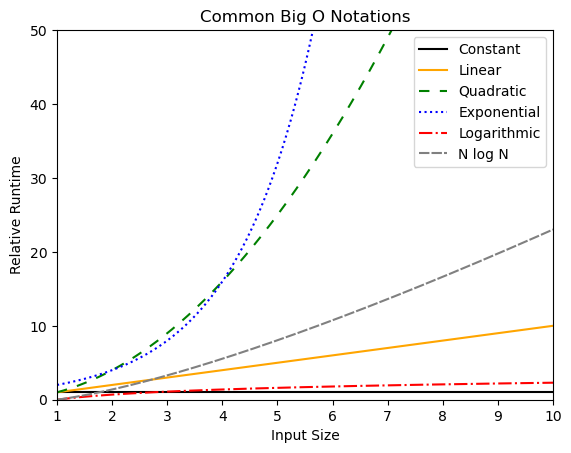

In [19]:
import matplotlib.pyplot as plt
import numpy as np
n = np.linspace(1, 10, 1000)
line_names = [
    "Constant",
    "Linear",
    "Quadratic",
    "Exponential",
    "Logarithmic",
    "N log N",
]

colors = ["black", "orange", "green", "blue", "red", [0.5, 0.5, 0.5]]
linestyles = ["solid", "solid", (0, (5, 5)), "dotted", "dashdot", (0, (5, 1))]
big_o = [np.ones(n.shape), n, n**2, 2**n, np.log(n), n * (np.log(n))]

fig, ax = plt.subplots()
fig.set_facecolor("white")

ax.set_ylim(0, 50)
ax.set_xlim(1, 10)
for i in range(len(big_o)):
    ax.plot(n, big_o[i], label=line_names[i], color=colors[i], linestyle=linestyles[i])
ax.set_ylabel("Relative Runtime")
ax.set_xlabel("Input Size")
ax.legend()
ax.set_title("Common Big O Notations")
fig.savefig("seds_0202_v3.png", bbox_inches="tight")